### Importing libraries

In [6]:
import pandas as pd
from nltk.stem import WordNetLemmatizer
from matplotlib import pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,r2_score
import pickle

### Importing the data

In [7]:
df = pd.read_csv(r"C:\Users\Xyz\Downloads\spam.csv")

In [8]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [18]:
# all words present in ham emails
ham_words = ' '.join(df[df['Category'] == 'ham']['Message'].values)

In [19]:
len(ham_words)

349562

#### most repreated words from  ham emails

In [23]:
ham_plot = WordCloud().generate(ham_words)

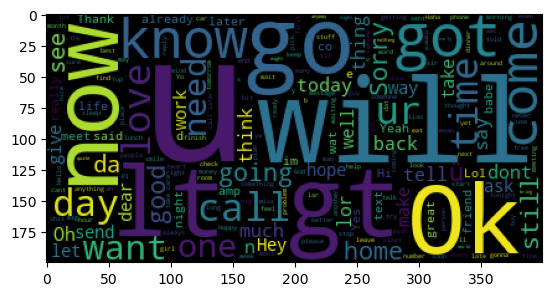

In [27]:
plt.imshow(ham_plot)

In [ ]:
# max_words = most repeated word
# backgroud_color = change background color of plot

In [30]:
ham_plot = WordCloud(max_words=10,background_color='white').generate(ham_words)

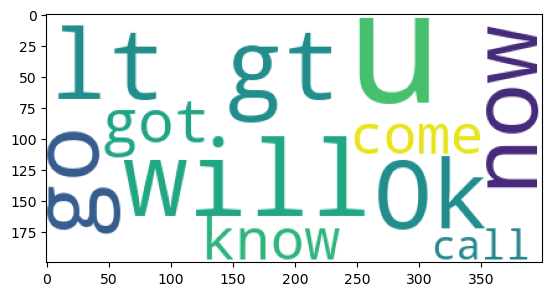

In [31]:
plt.imshow(ham_plot)

#### most repeated spam words

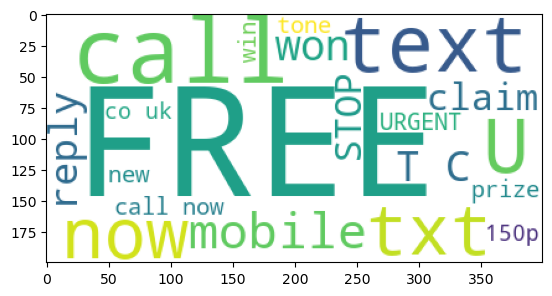

In [33]:
spam_words = ' '.join(df[df['Category'] == 'spam']['Message'].values)
spam_plot = WordCloud(max_words=20,background_color='white').generate(spam_words)
plt.imshow(spam_plot)

<Axes: xlabel='Category'>

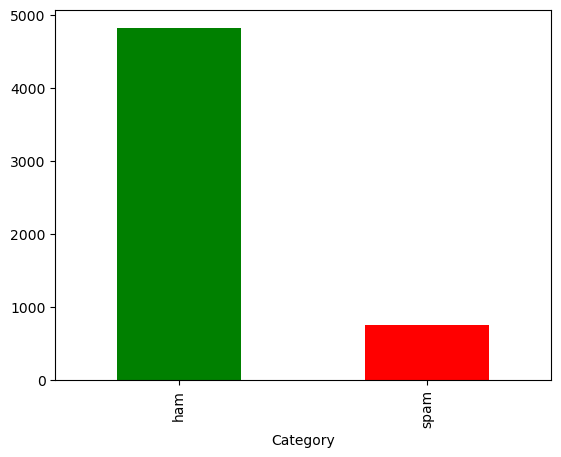

In [34]:
df['Category'].value_counts().plot(kind='bar',color=['green','red'])

### Convert to numerical format
- BOW
- TF-IDF

### Bag Of Words

In [38]:
bow = CountVectorizer(stop_words='english')

In [41]:
bow.fit(df['Message'])
X = bow.transform(df['Message']).toarray()
y = df['Category']

In [51]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=23)

In [52]:
X_train.shape

(4457, 8440)

In [53]:
X_test.shape

(1115, 8440)

In [54]:
y_train.shape

(4457,)

In [55]:
y_test.shape

(1115,)

### ML Algorithms

#### KNN

In [56]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.9022421524663677

#### Naive Bayesm

In [58]:
nb = MultinomialNB()
nb.fit(X_train,y_train)
y_pred = nb.predict(X_test)
accuracy_score(y_test,y_pred)

0.9820627802690582

#### Decision Tree

In [60]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
accuracy_score(y_test,y_pred)

0.9650224215246637

### Deployment

In [75]:
email = input("Enter the Email: ")
data = bow.transform([email]).toarray()
nb.predict(data)

Enter the Email: 


array(['ham'], dtype='<U4')

In [76]:
pickle.dump(nb,open("nb.pkl","wb"))
model = pickle.load(open("nb.pkl","rb"))

In [78]:
bow = CountVectorizer(stop_words='english')
bow.fit(df['Message'])
pickle.dump(bow,open(r"bow.pkl",'wb'))